In [ ]:
import numpy as np
import pandas as pd

df= pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import tensorflow as tf

train_df= df.sample(frac=0.75, random_state=4)
val_df=df.drop(train_df.index)

In [ ]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
289,11.6,0.42,0.53,3.3,0.105,33.0,98.0,1.00100,3.20,0.95,9.2,5
962,6.6,0.57,0.02,2.1,0.115,6.0,16.0,0.99654,3.38,0.69,9.5,5
826,7.5,0.27,0.34,2.3,0.050,4.0,8.0,0.99510,3.40,0.64,11.0,7
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
57,7.5,0.63,0.12,5.1,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,5


In [ ]:
x_train=train_df.drop('quality', axis=1)
x_test=val_df.drop('quality', axis=1)
y_train=train_df['quality']
y_test=val_df['quality']
input_shape=[x_train.shape[1]]
input_shape

[11]

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=input_shape)])
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x78bc0698ec20>>

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=128,activation='relu',input_shape=input_shape),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x78bbf7706f50>>

In [ ]:
model.compile(optimizer='adam', loss='mae')

In [ ]:
losses = model.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=256, epochs=15)

Epoch 1/15
5/5 [==============================] - 1s 59ms/step - loss: 3.8190 - val_loss: 2.9224
Epoch 2/15
5/5 [==============================] - 0s 17ms/step - loss: 2.5504 - val_loss: 1.2983
Epoch 3/15
5/5 [==============================] - 0s 19ms/step - loss: 1.5742 - val_loss: 0.9783
Epoch 4/15
5/5 [==============================] - 0s 17ms/step - loss: 1.0905 - val_loss: 0.9207
Epoch 5/15
5/5 [==============================] - 0s 13ms/step - loss: 0.9429 - val_loss: 0.7998
Epoch 6/15
5/5 [==============================] - 0s 19ms/step - loss: 0.8388 - val_loss: 0.6833
Epoch 7/15
5/5 [==============================] - 0s 17ms/step - loss: 0.8061 - val_loss: 0.6673
Epoch 8/15
5/5 [==============================] - 0s 14ms/step - loss: 0.7540 - val_loss: 0.6261
Epoch 9/15
5/5 [==============================] - 0s 14ms/step - loss: 0.6822 - val_loss: 0.7341
Epoch 10/15
5/5 [==============================] - 0s 13ms/step - loss: 0.6797 - val_loss: 0.6504
Epoch 11/15
5/5 [============

In [ ]:
model.predict(x_test.iloc[0:3, :])

1/1 [==============================] - 0s 24ms/step


array([[5.153789 ],
       [5.8054833],
       [4.8426385]], dtype=float32)

In [ ]:
y_test.iloc[0:3]

0     5
9     5
12    5
Name: quality, dtype: int64

<Axes: >

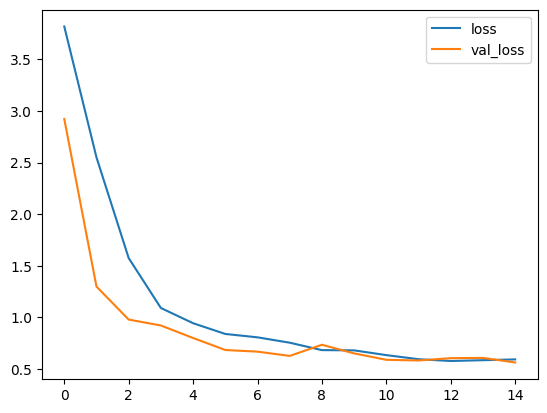

In [ ]:
loss_df=pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()